# Data Format Context (Python)

## Image data

First we load the necessary packages.

In [1]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
from skimage import transform

In [2]:
single_image = cv2.imread("../data/102flowers/image_00001.jpg")

In [3]:
single_image

array([[[ 96, 120, 126],
        [ 94, 118, 124],
        [ 91, 115, 121],
        ...,
        [ 15,  28,  26],
        [ 17,  30,  28],
        [ 18,  31,  29]],

       [[ 97, 121, 127],
        [ 95, 119, 125],
        [ 92, 116, 122],
        ...,
        [ 14,  27,  25],
        [ 15,  28,  26],
        [ 16,  29,  27]],

       [[102, 124, 130],
        [100, 122, 128],
        [ 94, 118, 124],
        ...,
        [ 11,  24,  22],
        [ 13,  26,  24],
        [ 13,  26,  24]],

       ...,

       [[116, 157, 150],
        [112, 153, 146],
        [105, 148, 139],
        ...,
        [ 34,  51,  70],
        [ 34,  51,  70],
        [ 35,  52,  71]],

       [[118, 159, 152],
        [113, 154, 147],
        [107, 150, 141],
        ...,
        [ 34,  51,  70],
        [ 34,  51,  70],
        [ 35,  52,  71]],

       [[119, 160, 153],
        [115, 156, 149],
        [108, 151, 142],
        ...,
        [ 34,  51,  70],
        [ 34,  51,  70],
        [ 35,  52,  71]]

How would this look like in R?


```r
library(magick)

single_image <- image_read('path')
class(single_image)
[1] "magick-image"

```

In [4]:
type(single_image)

numpy.ndarray

In [5]:
len(single_image)

500

In [6]:
single_image.shape

(500, 591, 3)

Those are the RGB values of every pixel. Now let's display the image:

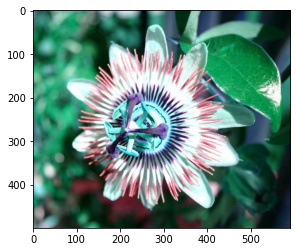

In [7]:
plt.imshow(single_image)
plt.show()

In [8]:
rotated_image = transform.rotate(single_image, angle=180)

In [9]:
rotated_image.shape

(500, 591, 3)

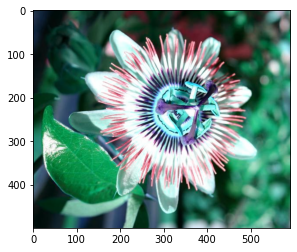

In [10]:
plt.imshow(rotated_image)
plt.show()

Question: Why would we want to do this?

We can do this with `numpy` too (again a good example of API consistency):

In [11]:
rotated_image = np.fliplr(rotated_image)

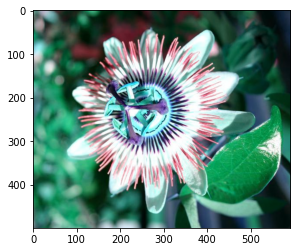

In [12]:
plt.imshow(rotated_image)
plt.show()

In [13]:
resized_image = cv2.resize(single_image, (150, 150))

In [14]:
resized_image.shape

(150, 150, 3)

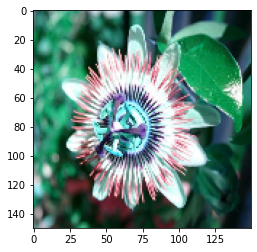

In [15]:
plt.imshow(resized_image)
plt.show()

Here we can use another package (again - completely interchangeably):

In [16]:
grayscale_image = cv2.cvtColor(single_image, cv2.COLOR_RGB2GRAY)

In [17]:
grayscale_image.shape

(500, 591)

Notice any difference?

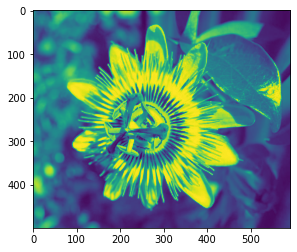

In [18]:
plt.imshow(grayscale_image)
plt.show()

## Text data

Note: to use NLTK you'll need to download additional datasets. Use the error messages: `nltk.download('stopwords')`

In [19]:
import pandas as pd
import nltk
from nltk.corpus import stopwords

In [20]:
reviews = pd.read_csv("../data/reviews_Clothing_Shoes_and_Jewelry_5.csv")

In [21]:
reviews.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A1KLRMWW2FWPL4,0000031887,"Amazon Customer ""cameramom""","[0, 0]",This is a great tutu and at a really great pri...,5,Great tutu- not cheaply made,1297468800,"02 12, 2011"
1,A2G5TCU2WDFZ65,0000031887,Amazon Customer,"[0, 0]",I bought this for my 4 yr old daughter for dan...,5,Very Cute!!,1358553600,"01 19, 2013"
2,A1RLQXYNCMWRWN,0000031887,Carola,"[0, 0]",What can I say... my daughters have it in oran...,5,I have buy more than one,1357257600,"01 4, 2013"
3,A8U3FAMSJVHS5,0000031887,Caromcg,"[0, 0]","We bought several tutus at once, and they are ...",5,"Adorable, Sturdy",1398556800,"04 27, 2014"
4,A3GEOILWLK86XM,0000031887,CJ,"[0, 0]",Thank you Halo Heaven great product for Little...,5,Grammy's Angels Love it,1394841600,"03 15, 2014"


In [22]:
single_review = reviews["reviewText"][10]

In [23]:
single_review

'Wonder my niece wears it every single day, yellow is her favorite color right now an this cute little tutu made he da. It is well built and we hope she gets lots of wear out of it.'

In [24]:
type(single_review)

str

In [25]:
single_review.lower()

'wonder my niece wears it every single day, yellow is her favorite color right now an this cute little tutu made he da. it is well built and we hope she gets lots of wear out of it.'

In [26]:
single_review.upper()

'WONDER MY NIECE WEARS IT EVERY SINGLE DAY, YELLOW IS HER FAVORITE COLOR RIGHT NOW AN THIS CUTE LITTLE TUTU MADE HE DA. IT IS WELL BUILT AND WE HOPE SHE GETS LOTS OF WEAR OUT OF IT.'

In [27]:
sentences = nltk.sent_tokenize(single_review)

In [28]:
sentences

['Wonder my niece wears it every single day, yellow is her favorite color right now an this cute little tutu made he da.',
 'It is well built and we hope she gets lots of wear out of it.']

In [29]:
len(sentences)

2

In [30]:
sentence = sentences[0]
words = nltk.word_tokenize(sentence)
words

['Wonder',
 'my',
 'niece',
 'wears',
 'it',
 'every',
 'single',
 'day',
 ',',
 'yellow',
 'is',
 'her',
 'favorite',
 'color',
 'right',
 'now',
 'an',
 'this',
 'cute',
 'little',
 'tutu',
 'made',
 'he',
 'da',
 '.']

Now let's remove the stop words:

In [31]:
stop_words = set(stopwords.words('english'))

In [32]:
stopwords

<WordListCorpusReader in '/Users/boyanangelov/nltk_data/corpora/stopwords'>

In [33]:
filtered_sentence = [w for w in words if not w.lower() in stop_words]

In [34]:
filtered_sentence

['Wonder',
 'niece',
 'wears',
 'every',
 'single',
 'day',
 ',',
 'yellow',
 'favorite',
 'color',
 'right',
 'cute',
 'little',
 'tutu',
 'made',
 'da',
 '.']

As an exercise, try to remove the punctuation.

In [35]:
import spacy

In [36]:
nlp = spacy.load("en_core_web_sm")

In [37]:
doc = nlp(sentences[0])

In [38]:
doc

Wonder my niece wears it every single day, yellow is her favorite color right now an this cute little tutu made he da.

In [39]:
type(doc)

spacy.tokens.doc.Doc

In [40]:
for token in doc:
    print(token.text)

Wonder
my
niece
wears
it
every
single
day
,
yellow
is
her
favorite
color
right
now
an
this
cute
little
tutu
made
he
da
.


In [41]:
for token in doc:
    print(token.text, token.lemma_, token.pos_, token.tag_, token.dep_,
            token.shape_, token.is_alpha, token.is_stop)

Wonder wonder VERB VB advcl Xxxxx True False
my my PRON PRP$ poss xx True True
niece niece NOUN NN nsubj xxxx True False
wears wear VERB VBZ ccomp xxxx True False
it it PRON PRP dobj xx True True
every every DET DT det xxxx True True
single single ADJ JJ amod xxxx True False
day day NOUN NN npadvmod xxx True False
, , PUNCT , punct , False False
yellow yellow PROPN NNP nsubj xxxx True False
is be AUX VBZ ROOT xx True True
her her PRON PRP$ poss xxx True True
favorite favorite ADJ JJ amod xxxx True False
color color NOUN NN attr xxxx True False
right right ADV RB advmod xxxx True False
now now ADV RB advmod xxx True True
an an DET DT det xx True True
this this DET DT det xxxx True True
cute cute ADJ JJ amod xxxx True False
little little ADJ JJ amod xxxx True False
tutu tutu NOUN NN nsubj xxxx True False
made make VERB VBD dep xxxx True True
he he PRON PRP nsubj xx True True
da da VERB VB ccomp xx True False
. . PUNCT . punct . False False


In [42]:
from spacy import displacy

In [46]:
displacy.render(doc, style="ent", jupyter=True)

In [45]:
displacy.render(doc, style="dep", jupyter=True)

We can have even built in word embeddings:

In [ ]:
doc.vector

In [ ]:
similar_sentence = "Wonder my niece wears it every single day, blue is her favorite color \
right now an this cute little tutu made he da"

In [ ]:
doc2 = nlp(similar_sentence)

In [ ]:
 doc.similarity(doc2)